<a href="https://colab.research.google.com/github/LuuQuangHoi/CuoiKy_AI_Tomato_diseases/blob/main/Tomato_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Phát hiện bệnh cây cà chua
# Lưu Quang Hội - 20146124

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from numpy import asarray,save
from sklearn.model_selection import train_test_split
from time import time
from keras.utils import load_img, img_to_array
from keras.utils  import to_categorical
from keras.models import Sequential, Model
from keras.layers import *
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.engine.training import optimizers
from keras.backend import categorical_crossentropy

In [ ]:
folder = '/content/drive/MyDrive/AI_CuoiKy/Data_Plant_Tomato/'

img_size = 100;
photos, labels = list(), list()
for file in listdir(folder) :
  output = 0.0
  if file.startswith('CaChua_Binh_thuong'):
    output = 1.0
  if file.startswith('CaChua_Chay_la'):
    output = 2.0
  if file.startswith('CaChua_Dom_do_nhen_gay_ra'):
    output = 3.0
  if file.startswith('CaChua_Dom_la_Septoria'):
    output = 4.0
  if file.startswith('CaChua_Dom_vi_khuan'):
    output = 5.0
  if file.startswith('CaChua_Dom_vong'):
    output = 6.0
  if file.startswith('CaChua_Heo_muon'):
    output = 7.0
  if file.startswith('CaChua_Kham_la_Mosaic'):
    output = 8.0
  if file.startswith('CaChua_Moc_la'):
    output = 9.0
  if file.startswith('CaChua_Vang_xoan_la_Curl'):
    output = 10.0

  photo = load_img(folder + file, target_size = (img_size,img_size))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
  
photos = asarray(photos)
labels = np.array(labels)
print(photos.shape, labels.shape)

(15425, 100, 100, 3) (15425,)


In [ ]:
photos = photos.astype('float32')/255.0
print(photos.shape)

(15425, 100, 100, 3)


In [ ]:
(trainX, testX, trainY, testY) = train_test_split(photos, labels, test_size=0.20, stratify=labels, random_state=10)
(trainX, valX, trainY, valY) = train_test_split(trainX, trainY, test_size=0.25, random_state=10)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)
print(valX.shape)
print(valY.shape)

(9255, 100, 100, 3)
(9255,)
(3085, 100, 100, 3)
(3085,)
(3085, 100, 100, 3)
(3085,)


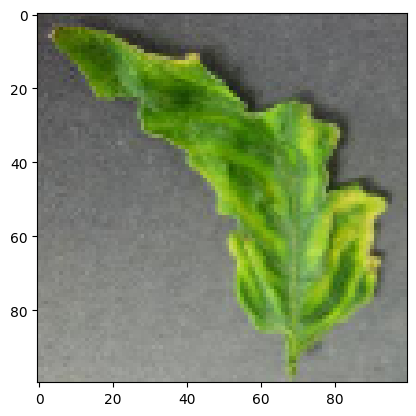

Bệnh này là:  10.0


In [ ]:
image_test = 20
hinh = trainX[image_test]
plt.imshow(hinh) 
plt.show()  
print('Bệnh này là: ', trainY[image_test])

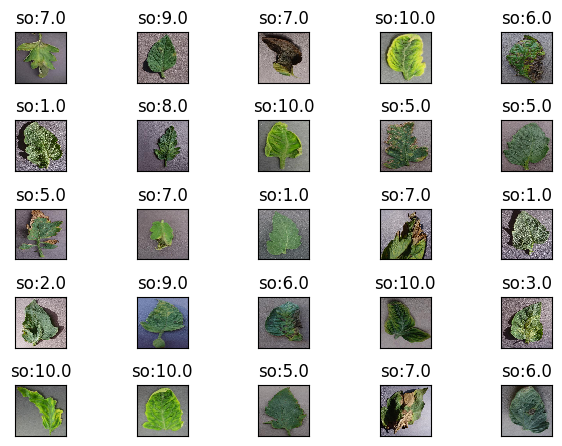

In [ ]:
for i in range(25):  # 25 hình ảnh
  plt.subplot(5,5,i+1) # 5 cột , 5 hàng
  plt.tight_layout()
  plt.imshow(trainX[i], interpolation='none')
  plt.title('so:{}'.format(trainY[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
 #one hot enccoding giatri mau tung diem anh tu thap phan duoi dang 10 bit
trainY = to_categorical (trainY)
testY=to_categorical(testY)
valY=to_categorical(valY)

print(trainY.shape)
print(testY.shape)
print(valY.shape)

(9255, 11)
(3085, 11)
(3085, 11)


In [ ]:
batch_size=32
epochs = 50
classes = 11

#Tạo 1 mạng có 28x28 input và 10 output
model = Sequential()

# 1 bộ VGG
model.add(Conv2D(32, kernel_size=(3,3), activation = 'tanh', input_shape=(img_size,img_size,3),padding = 'same'))
model.add(LeakyReLU(alpha=0.1))  # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding='same'))


# Bộ 2 VGG
model.add(Conv2D(64,(3,3) , activation = 'tanh' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))

# Bộ 3 VGG
model.add(Conv2D(128,(3,3) , activation = 'tanh' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))




# ANN Model
model.add(Flatten()) # Lấy kích thước trước rồi làm phẳng
model.add(Dense(128, activation = 'tanh'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax'))     



model.compile(loss = categorical_crossentropy, optimizer = Adam() , metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 50, 50, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                    

In [ ]:
start = time()
train = model.fit(trainX, trainY, batch_size,epochs=50,verbose = 1, validation_data=(valX, valY))
print(time()-start)

Epoch 1/50
290/290 [==============================] - 311s 1s/step - loss: 0.9877 - accuracy: 0.6731 - val_loss: 0.6686 - val_accuracy: 0.7712
Epoch 2/50
290/290 [==============================] - 307s 1s/step - loss: 0.4338 - accuracy: 0.8587 - val_loss: 0.4468 - val_accuracy: 0.8457
Epoch 3/50
290/290 [==============================] - 291s 1s/step - loss: 0.3170 - accuracy: 0.8966 - val_loss: 0.3266 - val_accuracy: 0.8950
Epoch 4/50
290/290 [==============================] - 303s 1s/step - loss: 0.2294 - accuracy: 0.9304 - val_loss: 0.2929 - val_accuracy: 0.9053
Epoch 5/50
290/290 [==============================] - 309s 1s/step - loss: 0.1778 - accuracy: 0.9459 - val_loss: 0.2545 - val_accuracy: 0.9115
Epoch 6/50
290/290 [==============================] - 303s 1s/step - loss: 0.1319 - accuracy: 0.9627 - val_loss: 0.2828 - val_accuracy: 0.9053
Epoch 7/50
290/290 [==============================] - 317s 1s/step - loss: 0.0959 - accuracy: 0.9757 - val_loss: 0.2449 - val_accuracy: 0.9147

In [ ]:
model.save('/content/drive/MyDrive/AI_Train/Model_Train/ModelTomato.h5')

Text(0.5, 0, 'Epoch')

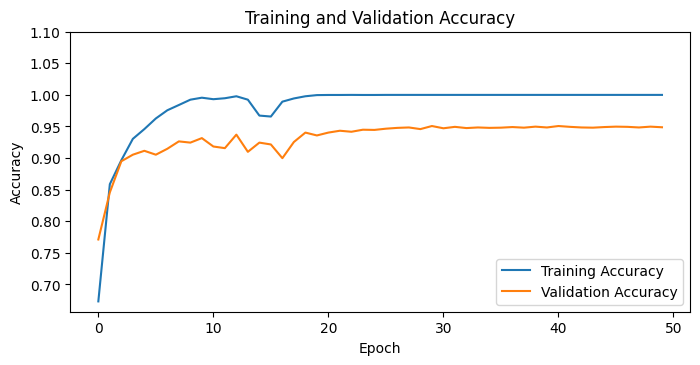

In [ ]:
acc=train.history['accuracy']
val_acc=train.history['val_accuracy']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')

plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1.1])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')

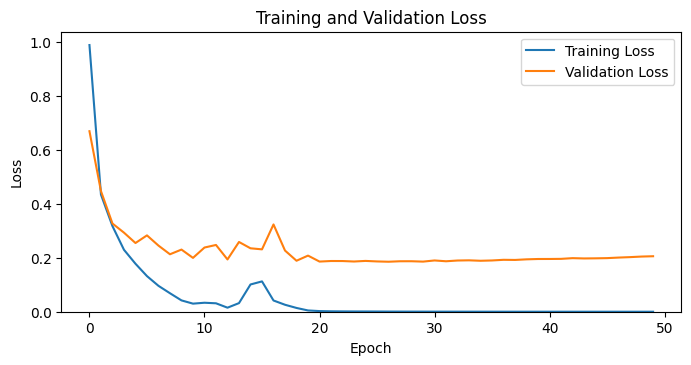

In [ ]:
acc=train.history['accuracy']
val_acc=train.history['val_accuracy']
loss=train.history['loss']
val_loss=train.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.ylim(0)
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()

1/1 [==============================] - 0s 136ms/step
Predicted:  CaChua_Heo_muon


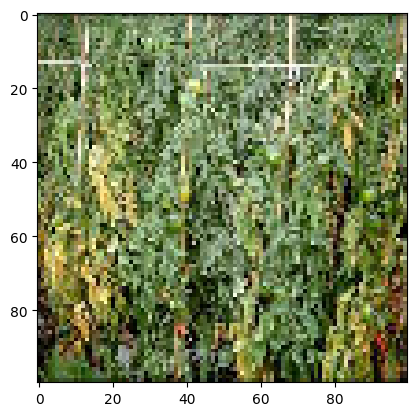

In [ ]:
name= {1:'CaChua_Binh_thuong', 2:'CaChua_Chay_la',3:'CaChua_Dom_do_nhen_gay_ra',
       4:'CaChua_Dom_la_Septoria',5:'CaChua_Dom_vi_khuan',6:'CaChua_Dom_vong',
       7:'CaChua_Heo_muon',8:'CaChua_Kham_la_Mosaic',9:'CaChua_Moc_la',10:'CaChua_Vang_xoan_la_Curl'}  
#test
filePath = '/content/drive/MyDrive/AI_CuoiKy/heomuon.jpg'
testImage = load_img(filePath, target_size=(img_size,img_size))
arrayImage = img_to_array(testImage).reshape(1,img_size,img_size,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", name[pred])
plt.imshow(testImage)

In [ ]:
# Tạo một mảng các chỉ số ngẫu nhiên
random_indices = np.random.choice(len(testX), size=100, replace=False)

# Lấy ra 30 mẫu ngẫu nhiên từ tập dữ liệu testX và testY
random_testX = testX[random_indices]
random_testY = testY[random_indices]

# Dùng mô hình để dự đoán nhãn của các mẫu trong tập dữ liệu ngẫu nhiên
results = model.predict(random_testX)
predicted_labels = np.argmax(results, axis=1)

from sklearn.metrics import accuracy_score
# tính độ chính xác 
accuracy = accuracy_score(np.argmax(random_testY, axis=1), predicted_labels)
print("Accuracy:", accuracy*100,"%")

4/4 [==============================] - 1s 304ms/step
Accuracy: 92.0 %
